In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("labeling_df.csv")

In [3]:
df.head()

,year,month,day,user_name,favorite_count,retweet_count,text,user_location_ab,word_count,char_count,average_word_len,polarity
0,2017,3,11,ADub,0,16427,RT @GeorgeTakei: The GOP wants to ensure the m...,SK,25,139,4.600000,-0.150
1,2017,6,12,Annapolis NDP,1,0,Urgent-health care planning must be based on a...,NS,16,115,6.250000,0.000
2,2017,6,21,Lethbridge living,1,0,This research project is focused on making pri...,AB,13,107,7.307692,0.425
3,2017,6,14,THĒ RÅÏŃ MÅÑ ☔️,0,40988,RT @SenSanders: BREAKING: Senate Republicans j...,AB,19,140,6.421053,0.000
4,2017,6,8,Steven Holland,0,27,RT @AndreaHorwath: Simply appalling. We have t...,ON,27,148,4.518519,-0.350


In [4]:
df1 = df.drop(['year','month','day','user_name','favorite_count','retweet_count','user_location_ab','word_count','char_count','average_word_len'],axis=1)

In [5]:
df1.head()

,text,polarity
0,RT @GeorgeTakei: The GOP wants to ensure the m...,-0.150
1,Urgent-health care planning must be based on a...,0.000
2,This research project is focused on making pri...,0.425
3,RT @SenSanders: BREAKING: Senate Republicans j...,0.000
4,RT @AndreaHorwath: Simply appalling. We have t...,-0.350


In [6]:
df1.isna().any()

text        False
polarity    False
dtype: bool

In [7]:
df1.head(4)

,text,polarity
0,RT @GeorgeTakei: The GOP wants to ensure the m...,-0.150
1,Urgent-health care planning must be based on a...,0.000
2,This research project is focused on making pri...,0.425
3,RT @SenSanders: BREAKING: Senate Republicans j...,0.000


In [8]:
df1['sentiment'] = pd.cut(df1.polarity,
                         bins=[-1.1,-0.5,-0.1,0.1,0.5,1],
                         labels=[0,1,2,3,4])

In [9]:
df1.head()

,text,polarity,sentiment
0,RT @GeorgeTakei: The GOP wants to ensure the m...,-0.150,1
1,Urgent-health care planning must be based on a...,0.000,2
2,This research project is focused on making pri...,0.425,3
3,RT @SenSanders: BREAKING: Senate Republicans j...,0.000,2
4,RT @AndreaHorwath: Simply appalling. We have t...,-0.350,1


In [10]:
df1.isnull().any()

text         False
polarity     False
sentiment    False
dtype: bool

In [11]:
df1.count()

text         294528
polarity     294528
sentiment    294528
dtype: int64

In [12]:
df2 = df1.drop_duplicates()

In [13]:
df2.count()
# Compared with df1, there have 128666 tweets are duplicated. 

text         165862
polarity     165862
sentiment    165862
dtype: int64

In [ ]:
#I choosed the dupilicates removed dataset df2 to be continue.

In [14]:
neg_phrases = df2[df2.sentiment == 0]

In [15]:
neg_words = []
for t in neg_phrases.text:
    neg_words.append(t)
neg_words[:4]

['RT @JewRicans: Republican #trumpcare healthcare plan is to #masa Make America Sick Again #TheResistance #p2 https://t.co/8n6V9sXSXV',
 "I'm sorry if i did something wrong. https://t.co/OVDUfXe8xR",
 "RT @Tom_Parkin_: Too bad Trump didn't tell Justin to  increase healthcare, childcare or housing spending. https://t.co/2ifyfT9uPn",
 '@POTUS you are disgusting. Millions will be without healthcare and you gloat. 👎🏼']

In [16]:
neg_text = pd.Series(neg_words).str.cat(sep=" ")
neg_text[:100]

'RT @JewRicans: Republican #trumpcare healthcare plan is to #masa Make America Sick Again #TheResista'

In [17]:
for t in neg_phrases.text[:300]:
    if 'good' in t:
        print(t)

In [18]:
pos_phrases = df1[df1.sentiment == 4]
pos_words = []
for t in pos_phrases.text:
    pos_words.append(t)
pos_words[:4]

["RT @nowthisnews: This Democratic congressman had the perfect takedown of Paul Ryan and the GOP's health care plan https://t.co/j7JE4N62ec",
 'RT @SchlegelVillage: Thrilled to welcome Dr. Bob Bell, Deputy Minister of Health &amp; Long-Term Care to the Innovation Summit. #SVInnovates @O…',
 "RT @funder: Karen Handel denies climate science—thinks being gay is wrong—Anti-women's rights—Supports Trumpcare—She's perfect for GOP Cong…",
 'RT @sahilkapur: "We know this is not the best way to do health care," says @LindseyGrahamSC. "But it\'s the way we\'re having to do it."']

In [19]:
pos_text = pd.Series(pos_words).str.cat(sep=" ")
pos_text[:100]

"RT @nowthisnews: This Democratic congressman had the perfect takedown of Paul Ryan and the GOP's hea"

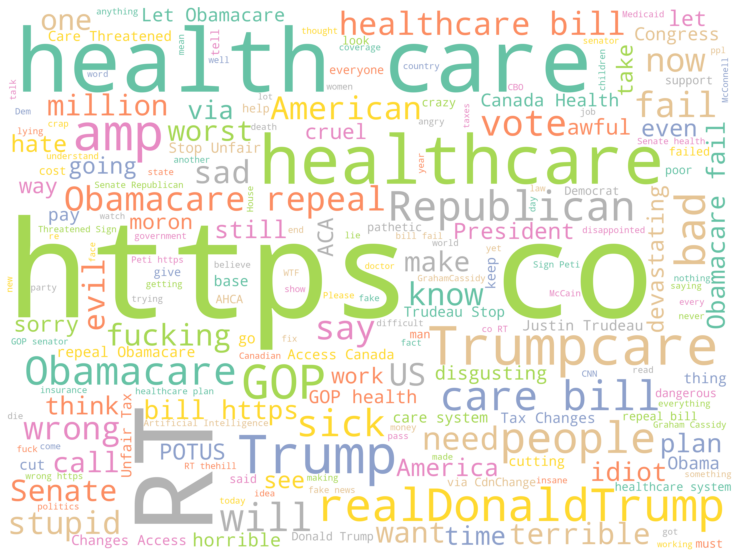

In [20]:
# 1.1 Word Cloud for negative health care tweets
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",width=3600, height=2700).generate(neg_text)
plt.figure(figsize=(16,10))
plt.imshow(wordcloud.recolor(colormap=plt.get_cmap('Set2')), interpolation='bilinear')
plt.axis("off")
plt.show()

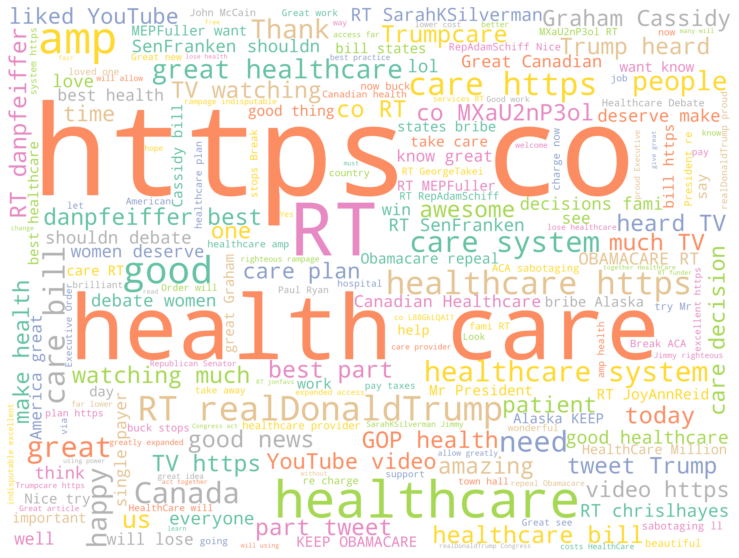

In [21]:
# 1.2 Word Cloud for positive health care tweets
wordcloud = WordCloud(background_color="white",width=3600, height=2700).generate(pos_text)
plt.figure(figsize=(16,10))
plt.imshow(wordcloud.recolor(colormap=plt.get_cmap('Set2')), interpolation='bilinear')
plt.axis("off")
plt.show()

In [29]:
#2. Term Frequancy (unigram to bigram)

In [ ]:
#2.1 Term Frequancy for negative sentiments

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
cvector = CountVectorizer(min_df = 0.0, max_df = 1.0, ngram_range=(1,1))
cvector.fit(df1.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=0.0,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [48]:
len(cvector.get_feature_names())

209496

In [49]:
neg_matrix = cvector.transform(df1[df1.sentiment == 0].text)
sli_neg_matrix = cvector.transform(df1[df1.sentiment == 1].text)
neu_matrix = cvector.transform(df1[df1.sentiment == 2].text)
sli_pos_matrix = cvector.transform(df1[df1.sentiment == 3].text)
pos_matrix = cvector.transform(df1[df1.sentiment == 4].text)

In [50]:
neg_words = neg_matrix.sum(axis=0)
neg_words_freq = [(word, neg_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
neg_tf = pd.DataFrame(list(sorted(neg_words_freq, key = lambda x:x[1], reverse = True)),columns = ['Terms','negative'])

In [51]:
neg_tf.head(10)

,Terms,negative
0,rt,9097
1,the,7077
2,https,6975
3,to,6636
4,co,6283
5,is,4229
6,health,4027
7,care,3910
8,it,3136
9,of,2889


In [52]:
neg_tf_df = neg_tf.set_index('Terms')
neg_tf_df.head(10)

,negative
Terms,
rt,9097
the,7077
https,6975
to,6636
co,6283
is,4229
health,4027
care,3910
it,3136


In [53]:
#2.2 Term Frequancy for slight-negative sentiments

In [54]:
sli_neg_words = sli_neg_matrix.sum(axis=0)
sli_neg_words_freq = [(word, sli_neg_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
sli_neg_tf = pd.DataFrame(list(sorted(sli_neg_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','slight-negative'])
sli_neg_tf_df = sli_neg_tf.set_index('Terms')
sli_neg_tf_df.head(10)

,slight-negative
Terms,
rt,27711
the,22069
https,18929
to,18528
co,16707
health,13530
is,13108
care,12793
of,10493


In [55]:
#2.3 Term Frequancy for neutral sentiments

In [56]:
neu_words = neu_matrix.sum(axis=0)
neu_words_freq = [(word, neu_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
neu_words_tf = pd.DataFrame(list(sorted(neu_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','neutral'])
neu_words_tf_df = neu_words_tf.set_index('Terms')
neu_words_tf_df.head(10)

,neutral
Terms,
rt,109676
https,98760
co,88172
the,79566
to,69501
health,56742
care,54555
of,40240
healthcare,39142


In [57]:
#2.4 Term Frequancy for slight-positive sentiments

In [58]:
sli_pos_words = sli_pos_matrix.sum(axis=0)
sli_pos_words_freq = [(word, sli_pos_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
sli_pos_words_tf = pd.DataFrame(list(sorted(sli_pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','slight-positive'])
sli_pos_words_tf_df = sli_pos_words_tf.set_index('Terms')
sli_pos_words_tf_df.head(10)

,slight-positive
Terms,
rt,53904
https,43220
to,40617
the,39585
co,38532
health,30064
care,29358
healthcare,24018
is,22803


In [59]:
#2.5 Term Frequancy for positive sentiments

In [60]:
pos_words = pos_matrix.sum(axis=0)
pos_words_freq = [(word, pos_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
pos_words_tf = pd.DataFrame(list(sorted(pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','positive'])
pos_words_tf_df = pos_words_tf.set_index('Terms')
pos_words_tf_df.head(10)

,positive
Terms,
https,8811
rt,8692
co,8118
the,7533
to,6981
healthcare,4415
care,4359
health,4334
for,3926


In [61]:
#2.6 Total term frequence of all the 5 sentiment classes

In [62]:

term_freq_df = pd.concat([neg_tf_df,sli_neg_tf_df,neu_words_tf_df,sli_pos_words_tf_df,pos_words_tf_df],axis=1)

/home/joe/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [63]:
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['slight-negative'] \
                                 + term_freq_df['neutral'] + term_freq_df['slight-positive'] \
                                 +  term_freq_df['positive'] 
term_freq_df.sort_values(by='total', ascending=False).head(20)

,negative,slight-negative,neutral,slight-positive,positive,total
rt,9097,27711,109676,53904,8692,209080
https,6975,18929,98760,43220,8811,176695
co,6283,16707,88172,38532,8118,157812
the,7077,22069,79566,39585,7533,155830
to,6636,18528,69501,40617,6981,142263
health,4027,13530,56742,30064,4334,108697
care,3910,12793,54555,29358,4359,104975
of,2889,10493,40240,21454,3669,78745
healthcare,2382,8315,39142,24018,4415,78272
is,4229,13108,34325,22803,3799,78264


Text(0.5, 1.0, 'Top 500 phrases in healthcare')

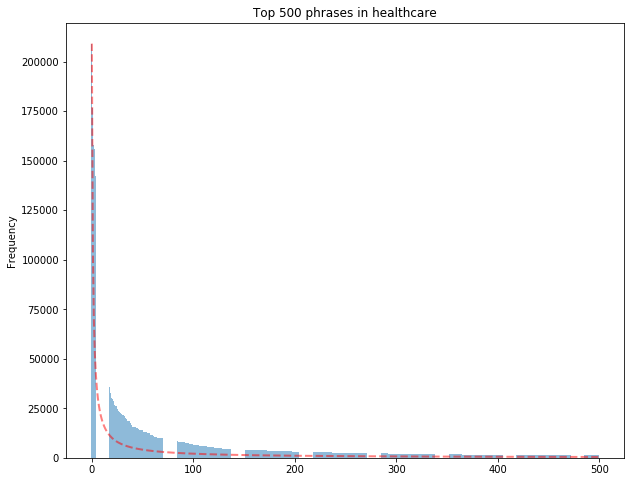

In [64]:
#2.7 Frequency plot of top frequent 500 phrases in healthcare tweets
y_pos = np.arange(500)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df.sort_values(by='total', ascending=False)['total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:500], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 500 phrases in healthcare')


In [65]:
#2.8 Plot of Absolute frequency of phrases against their rank

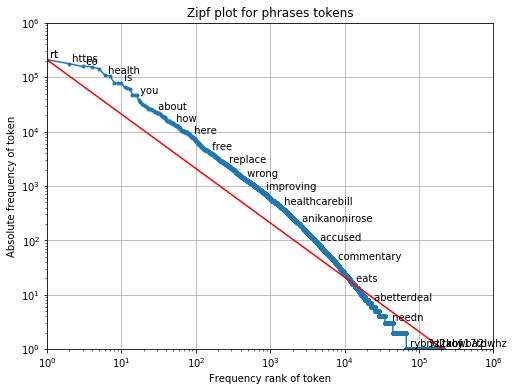

In [66]:
from pylab import *
counts = term_freq_df.total
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(8,6))
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for phrases tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

In [ ]:
#2.9 Tokens Visualisation

In [71]:

from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english',max_features=10000)
cvec.fit(df2.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=10000, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [72]:
neg_matrix = cvec.transform(df2[df2.sentiment == 0].text)
sli_neg_matrix = cvec.transform(df2[df2.sentiment == 1].text)
neu_matrix = cvec.transform(df2[df2.sentiment == 2].text)
sli_pos_matrix = cvec.transform(df2[df2.sentiment == 3].text)
pos_matrix = cvec.transform(df2[df2.sentiment == 4].text)

neg_words = neg_matrix.sum(axis=0)
neg_words_freq = [(word, neg_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
neg_tf = pd.DataFrame(list(sorted(neg_words_freq, key = lambda x:x[1], reverse = True)),columns = ['Terms','negative'])

neg_tf_df = neg_tf.set_index('Terms')

sli_neg_words = sli_neg_matrix.sum(axis=0)
sli_neg_words_freq = [(word, sli_neg_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
sli_neg_tf = pd.DataFrame(list(sorted(sli_neg_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','slight-negative'])
sli_neg_tf_df = sli_neg_tf.set_index('Terms')

neu_words = neu_matrix.sum(axis=0)
neu_words_freq = [(word, neu_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
neu_words_tf = pd.DataFrame(list(sorted(neu_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','neutral'])
neu_words_tf_df = neu_words_tf.set_index('Terms')

sli_pos_words = sli_pos_matrix.sum(axis=0)
sli_pos_words_freq = [(word, sli_pos_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
sli_pos_words_tf = pd.DataFrame(list(sorted(sli_pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','slight-positive'])
sli_pos_words_tf_df = sli_pos_words_tf.set_index('Terms')

pos_words = pos_matrix.sum(axis=0)
pos_words_freq = [(word, pos_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
pos_words_tf = pd.DataFrame(list(sorted(pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','positive'])
pos_words_tf_df = pos_words_tf.set_index('Terms')

term_freq_df = pd.concat([neg_tf_df,sli_neg_tf_df,neu_words_tf_df,sli_pos_words_tf_df,pos_words_tf_df],axis=1)

term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['slight-negative'] \
                                 + term_freq_df['neutral'] + term_freq_df['slight-positive'] \
                                 +  term_freq_df['positive'] 
term_freq_df.sort_values(by='total', ascending=False).head(20)

/home/joe/.local/lib/python3.6/site-packages/ipykernel_launcher.py:33: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,negative,slight-negative,neutral,slight-positive,positive,total
https,4636,12241,66569,29572,6476,119494
rt,3420,9655,42466,20052,3877,79470
health,1898,6968,29449,16673,2935,57923
care,1808,6620,28178,16325,3022,55953
healthcare,1625,5384,26526,15267,3148,51950
obamacare,1075,2471,10467,3692,668,18373
amp,495,1837,7283,4325,885,14825
trump,849,1999,7288,2818,538,13492
gop,656,1736,6058,2638,412,11500
people,441,1486,4072,2760,451,9210


Text(0.5, 1.0, 'Top 50 tokens in negative healthcare')

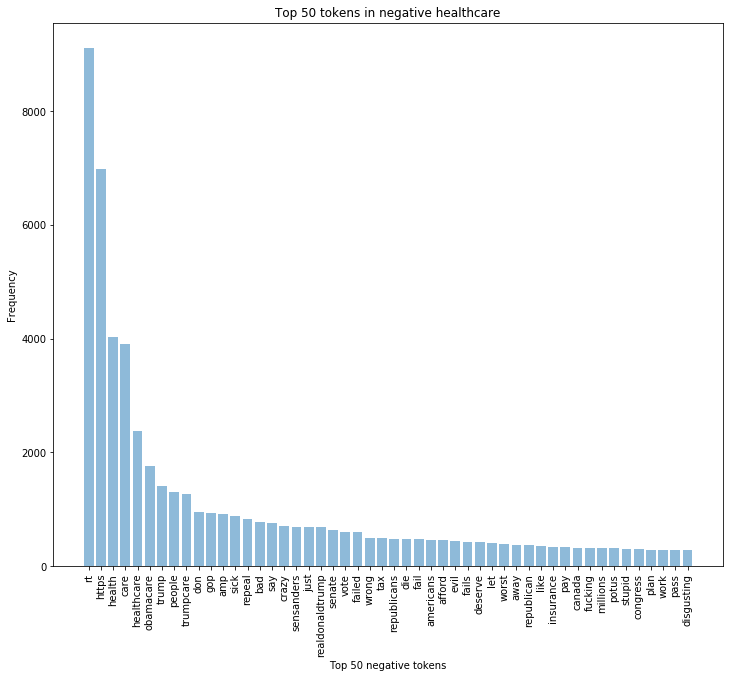

In [69]:

y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative healthcare')


Text(0.5, 1.0, 'Top 50 tokens in positive healthcare')

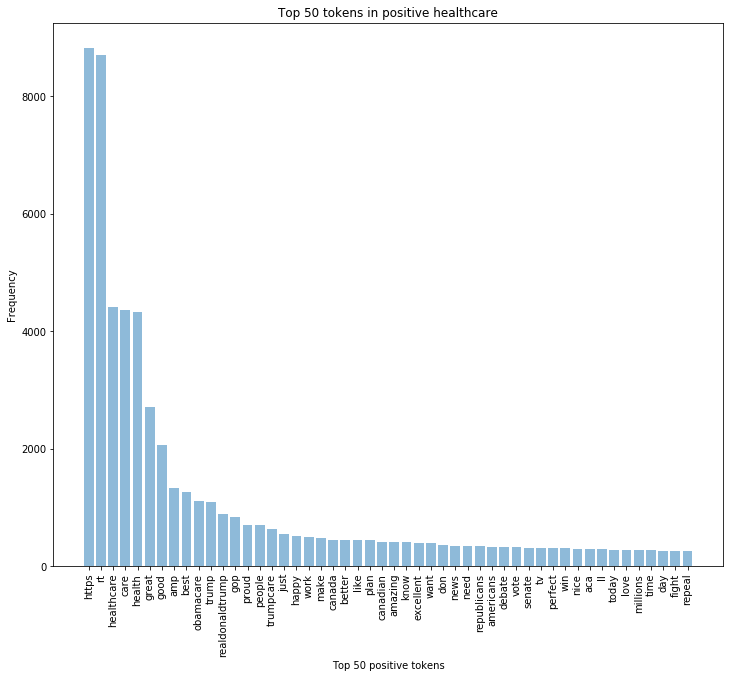

In [70]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive healthcare')


In [ ]:
#3 Supervised Machine Learning Models

In [ ]:
#3.1 Split whole data to train and test datasets, 80% for trainning, 20% for testing

In [73]:
phrase = np.array(df2['text'])
sentiments = np.array(df2['sentiment'])

from sklearn.model_selection import train_test_split    
phrase_train, phrase_test, sentiments_train, sentiments_test = train_test_split(phrase, sentiments, test_size=0.2, random_state=4)

In [74]:
#3.2 Implementation of TF-IDF on N-grams

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer

#<1> build TF-IDF features on unigram
tv1 = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,1),
                     sublinear_tf=True)
tv1_train_features = tv1.fit_transform(phrase_train)

#<2> build TF-IDF features on bigram
tv2 = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(2,2),
                     sublinear_tf=True)
tv2_train_features = tv2.fit_transform(phrase_train)

#<3> build TF-IDF features on trigram
tv3 = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(3,3),
                     sublinear_tf=True)
tv3_train_features = tv3.fit_transform(phrase_train)


In [80]:
# transform test reviews into features

tv1_test_features = tv1.transform(phrase_test)
tv2_test_features = tv2.transform(phrase_test)
tv3_test_features = tv3.transform(phrase_test)

In [81]:

print('TFIDF Unigram model:> Train features shape:', tv1_train_features.shape, ' Test features shape:', tv1_test_features.shape)
print('TFIDF Bigram model:> Train features shape:', tv2_train_features.shape, ' Test features shape:', tv2_test_features.shape)
print('TFIDF Trigram model:> Train features shape:', tv3_train_features.shape, ' Test features shape:', tv3_test_features.shape)

TFIDF Unigram model:> Train features shape: (132689, 177139)  Test features shape: (33173, 177139)
TFIDF Bigram model:> Train features shape: (132689, 786601)  Test features shape: (33173, 786601)
TFIDF Trigram model:> Train features shape: (132689, 1416285)  Test features shape: (33173, 1416285)


In [82]:
#3.3 Evaluation metrics

from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_curve, auc 


def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        4))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
                        

def train_predict_model(classifier, 
                        train_features, train_labels, 
                        test_features, test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features) 
    return predictions    


def display_confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, 
                                  labels=classes)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], classes], 
                                                  labels=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], classes], 
                                                labels=level_labels)) 
    print(cm_frame) 
    
def display_classification_report(true_labels, predicted_labels, classes=[1,0]):

    report = metrics.classification_report(y_true=true_labels, 
                                           y_pred=predicted_labels, 
                                           labels=classes) 
    print(report)
    
    
    
def display_model_performance_metrics(true_labels, predicted_labels, classes=[1,0]):
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels, 
                                  classes=classes)
    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels, 
                             classes=classes)


def plot_model_decision_surface(clf, train_features, train_labels,
                                plot_step=0.02, cmap=plt.cm.RdYlBu,
                                markers=None, alphas=None, colors=None):
    
    if train_features.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")
    
    x_min, x_max = train_features[:, 0].min() - plot_step, train_features[:, 0].max() + plot_step
    y_min, y_max = train_features[:, 1].min() - plot_step, train_features[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf_est = clone(clf)
    clf_est.fit(train_features,train_labels)
    if hasattr(clf_est, 'predict_proba'):
        Z = clf_est.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf_est.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap)
    
    le = LabelEncoder()
    y_enc = le.fit_transform(train_labels)
    n_classes = len(le.classes_)
    plot_colors = ''.join(colors) if colors else [None] * n_classes
    label_names = le.classes_
    markers = markers if markers else [None] * n_classes
    alphas = alphas if alphas else [None] * n_classes
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_enc == i)
        plt.scatter(train_features[idx, 0], train_features[idx, 1], c=color,
                    label=label_names[i], cmap=cmap, edgecolors='black', 
                    marker=markers[i], alpha=alphas[i])
    plt.legend()
    plt.show()


def plot_model_roc_curve(clf, features, true_labels, label_encoder=None, class_names=None):
    
    ## Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    if hasattr(clf, 'classes_'):
        class_labels = clf.classes_
    elif label_encoder:
        class_labels = label_encoder.classes_
    elif class_names:
        class_labels = class_names
    else:
        raise ValueError('Unable to derive prediction classes, please specify class_names!')
    n_classes = len(class_labels)
    y_test = label_binarize(true_labels, classes=class_labels)
    if n_classes == 2:
        if hasattr(clf, 'predict_proba'):
            prob = clf.predict_proba(features)
            y_score = prob[:, prob.shape[1]-1] 
        elif hasattr(clf, 'decision_function'):
            prob = clf.decision_function(features)
            y_score = prob[:, prob.shape[1]-1]
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")
        
        fpr, tpr, _ = roc_curve(y_test, y_score)      
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='ROC curve (area = {0:0.2f})'
                                 ''.format(roc_auc),
                 linewidth=2.5)
        
    elif n_classes > 2:
        if hasattr(clf, 'predict_proba'):
            y_score = clf.predict_proba(features)
        elif hasattr(clf, 'decision_function'):
            y_score = clf.decision_function(features)
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        ## Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        ## Compute macro-average ROC curve and ROC area
        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        # Finally average it and compute AUC
        mean_tpr /= n_classes
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        ## Plot ROC curves
        plt.figure(figsize=(6, 4))
        plt.plot(fpr["micro"], tpr["micro"],
                 label='micro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]), linewidth=3)

        plt.plot(fpr["macro"], tpr["macro"],
                 label='macro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["macro"]), linewidth=3)

        for i, label in enumerate(class_labels):
            plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                           ''.format(label, roc_auc[i]), 
                     linewidth=2, linestyle=':')
    else:
        raise ValueError('Number of classes should be atleast 2 or more')
        
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [84]:
#3.4 Logistic Regression model 

In [85]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2', max_iter=100, C=1)

In [86]:

#<1> Unigram

lr1_predictions = train_predict_model(classifier=lr, 
                                               train_features=tv1_train_features, train_labels=sentiments_train,
                                               test_features=tv1_test_features, test_labels=sentiments_test)
display_model_performance_metrics(true_labels=sentiments_test, predicted_labels=lr1_predictions,
                                      classes=[0,1,2,3,4])

/home/joe/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/joe/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Model Performance metrics:
------------------------------
Accuracy: 0.7763
Precision: 0.77
Recall: 0.7763
F1 Score: 0.7655

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.75      0.38      0.51      1360
           1       0.68      0.44      0.54      3823
           2       0.79      0.90      0.84     17275
           3       0.78      0.77      0.78      8863
           4       0.71      0.58      0.64      1852

    accuracy                           0.78     33173
   macro avg       0.74      0.62      0.66     33173
weighted avg       0.77      0.78      0.77     33173


Prediction Confusion Matrix:
------------------------------
          Predicted:                         
                   0     1      2     3     4
Actual: 0        522   185    639    11     3
        1        119  1688   1704   289    23
        2         46   458  15612  1081    78
        3          8   153   1507  6

/home/joe/.local/lib/python3.6/site-packages/ipykernel_launcher.py:56: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
/home/joe/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead


In [88]:

#<2> Bigram

lr2_predictions = train_predict_model(classifier=lr, 
                                               train_features=tv2_train_features, train_labels=sentiments_train,
                                               test_features=tv2_test_features, test_labels=sentiments_test)
display_model_performance_metrics(true_labels=sentiments_test, predicted_labels=lr2_predictions,
                                      classes=[0,1,2,3,4])


Model Performance metrics:
------------------------------
Accuracy: 0.6656
Precision: 0.6896
Recall: 0.6656
F1 Score: 0.623

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.84      0.12      0.21      1360
           1       0.70      0.23      0.34      3823
           2       0.64      0.94      0.76     17275
           3       0.74      0.50      0.60      8863
           4       0.74      0.21      0.32      1852

    accuracy                           0.67     33173
   macro avg       0.73      0.40      0.45     33173
weighted avg       0.69      0.67      0.62     33173


Prediction Confusion Matrix:
------------------------------
          Predicted:                       
                   0    1      2     3    4
Actual: 0        160   62   1106    32    0
        1         24  861   2657   277    4
        2          5  196  16258   795   21
        3          2  107   4227  4417  110
 

/home/joe/.local/lib/python3.6/site-packages/ipykernel_launcher.py:56: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
/home/joe/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead


In [89]:
#<3> Trigram

lr3_predictions = train_predict_model(classifier=lr, 
                                               train_features=tv3_train_features, train_labels=sentiments_train,
                                               test_features=tv3_test_features, test_labels=sentiments_test)
display_model_performance_metrics(true_labels=sentiments_test, predicted_labels=lr3_predictions,
                                      classes=[0,1,2,3,4])

Model Performance metrics:
------------------------------
Accuracy: 0.6139
Precision: 0.675
Recall: 0.6139
F1 Score: 0.5453

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.87      0.10      0.17      1360
           1       0.77      0.14      0.23      3823
           2       0.59      0.96      0.73     17275
           3       0.75      0.32      0.45      8863
           4       0.76      0.11      0.19      1852

    accuracy                           0.61     33173
   macro avg       0.75      0.32      0.35     33173
weighted avg       0.68      0.61      0.55     33173


Prediction Confusion Matrix:
------------------------------
          Predicted:                       
                   0    1      2     3    4
Actual: 0        130   17   1180    33    0
        1         11  519   3126   164    3
        2          6   80  16667   516    6
        3          2   52   5905  2852   52
 

/home/joe/.local/lib/python3.6/site-packages/ipykernel_launcher.py:56: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
/home/joe/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead


In [ ]:
#3.5 Support Vector Machine(SVM) 
# LinearSVC

In [90]:

from sklearn.svm import LinearSVC

clf = LinearSVC(multi_class='ovr', random_state=42)

In [91]:
# <1> Unigram

clf1_predictions = train_predict_model(classifier=clf, 
                                               train_features=tv1_train_features, train_labels=sentiments_train,
                                               test_features=tv1_test_features, test_labels=sentiments_test)
display_model_performance_metrics(true_labels=sentiments_test, predicted_labels=clf1_predictions,
                                      classes=[0,1,2,3,4])

Model Performance metrics:
------------------------------
Accuracy: 0.8207
Precision: 0.8172
Recall: 0.8207
F1 Score: 0.8179

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.76      0.63      0.69      1360
           1       0.69      0.60      0.64      3823
           2       0.86      0.89      0.88     17275
           3       0.81      0.83      0.82      8863
           4       0.77      0.69      0.73      1852

    accuracy                           0.82     33173
   macro avg       0.78      0.73      0.75     33173
weighted avg       0.82      0.82      0.82     33173


Prediction Confusion Matrix:
------------------------------
          Predicted:                         
                   0     1      2     3     4
Actual: 0        856   231    263     5     5
        1        185  2282   1139   195    22
        2         63   613  15459  1067    73
        3         17   178   1038 

/home/joe/.local/lib/python3.6/site-packages/ipykernel_launcher.py:56: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
/home/joe/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead


In [92]:
# <2> Bigram

clf2_predictions = train_predict_model(classifier=clf, 
                                               train_features=tv2_train_features, train_labels=sentiments_train,
                                               test_features=tv2_test_features, test_labels=sentiments_test)
display_model_performance_metrics(true_labels=sentiments_test, predicted_labels=clf2_predictions,
                                      classes=[0,1,2,3,4])

Model Performance metrics:
------------------------------
Accuracy: 0.7392
Precision: 0.7372
Recall: 0.7392
F1 Score: 0.7267

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.75      0.36      0.49      1360
           1       0.69      0.46      0.55      3823
           2       0.74      0.90      0.81     17275
           3       0.75      0.66      0.70      8863
           4       0.72      0.48      0.57      1852

    accuracy                           0.74     33173
   macro avg       0.73      0.57      0.63     33173
weighted avg       0.74      0.74      0.73     33173


Prediction Confusion Matrix:
------------------------------
          Predicted:                        
                   0     1      2     3    4
Actual: 0        496   161    664    38    1
        1        101  1754   1655   301   12
        2         49   452  15538  1173   63
        3         10   181   2560  5853

/home/joe/.local/lib/python3.6/site-packages/ipykernel_launcher.py:56: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
/home/joe/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead


In [93]:
# <3> Trigram

clf3_predictions = train_predict_model(classifier=clf, 
                                               train_features=tv3_train_features, train_labels=sentiments_train,
                                               test_features=tv3_test_features, test_labels=sentiments_test)
display_model_performance_metrics(true_labels=sentiments_test, predicted_labels=clf3_predictions,
                                      classes=[0,1,2,3,4])

Model Performance metrics:
------------------------------
Accuracy: 0.6759
Precision: 0.6805
Recall: 0.6759
F1 Score: 0.6532

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.74      0.29      0.42      1360
           1       0.69      0.35      0.46      3823
           2       0.67      0.89      0.77     17275
           3       0.68      0.52      0.59      8863
           4       0.71      0.34      0.46      1852

    accuracy                           0.68     33173
   macro avg       0.70      0.48      0.54     33173
weighted avg       0.68      0.68      0.65     33173


Prediction Confusion Matrix:
------------------------------
          Predicted:                        
                   0     1      2     3    4
Actual: 0        400    83    792    79    6
        1         80  1335   2045   352   11
        2         48   342  15412  1409   64
        3          8   157   3879  4646

/home/joe/.local/lib/python3.6/site-packages/ipykernel_launcher.py:56: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
/home/joe/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead


In [ ]:
#3.6 RandomForest model 

In [94]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=-1)

In [95]:
# <1> Unigram

rfc1_predictions = train_predict_model(classifier=rfc, 
                                               train_features=tv1_train_features, train_labels=sentiments_train,
                                               test_features=tv1_test_features, test_labels=sentiments_test)
display_model_performance_metrics(true_labels=sentiments_test, predicted_labels=rfc1_predictions,
                                      classes=[0,1,2,3,4])

/home/joe/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Model Performance metrics:
------------------------------
Accuracy: 0.6998
Precision: 0.7005
Recall: 0.6998
F1 Score: 0.6758

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.67      0.30      0.42      1360
           1       0.65      0.32      0.43      3823
           2       0.69      0.92      0.79     17275
           3       0.73      0.57      0.64      8863
           4       0.74      0.34      0.46      1852

    accuracy                           0.70     33173
   macro avg       0.70      0.49      0.55     33173
weighted avg       0.70      0.70      0.68     33173


Prediction Confusion Matrix:
------------------------------
          Predicted:                        
                   0     1      2     3    4
Actual: 0        413   139    767    41    0
        1        141  1241   2103   330    8
        2         47   357  15896   946   29
        3         12   162   3465  5039

/home/joe/.local/lib/python3.6/site-packages/ipykernel_launcher.py:56: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
/home/joe/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead


In [96]:
# <2> Bigram

rfc2_predictions = train_predict_model(classifier=rfc, 
                                               train_features=tv2_train_features, train_labels=sentiments_train,
                                               test_features=tv2_test_features, test_labels=sentiments_test)
display_model_performance_metrics(true_labels=sentiments_test, predicted_labels=rfc2_predictions,
                                      classes=[0,1,2,3,4])

Model Performance metrics:
------------------------------
Accuracy: 0.6819
Precision: 0.6941
Recall: 0.6819
F1 Score: 0.6541

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.65      0.29      0.40      1360
           1       0.69      0.34      0.46      3823
           2       0.66      0.93      0.78     17275
           3       0.77      0.47      0.58      8863
           4       0.66      0.34      0.45      1852

    accuracy                           0.68     33173
   macro avg       0.69      0.48      0.53     33173
weighted avg       0.69      0.68      0.65     33173


Prediction Confusion Matrix:
------------------------------
          Predicted:                        
                   0     1      2     3    4
Actual: 0        396    61    888    15    0
        1        125  1309   2142   233   14
        2         63   353  16109   700   50
        3         19   157   4247  4181

/home/joe/.local/lib/python3.6/site-packages/ipykernel_launcher.py:56: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
/home/joe/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead


In [97]:
# <3> Trigram

rfc3_predictions = train_predict_model(classifier=rfc, 
                                               train_features=tv3_train_features, train_labels=sentiments_train,
                                               test_features=tv3_test_features, test_labels=sentiments_test)
display_model_performance_metrics(true_labels=sentiments_test, predicted_labels=rfc3_predictions,
                                      classes=[0,1,2,3,4])

Model Performance metrics:
------------------------------
Accuracy: 0.6447
Precision: 0.6575
Recall: 0.6447
F1 Score: 0.6086

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.63      0.25      0.36      1360
           1       0.64      0.30      0.41      3823
           2       0.63      0.92      0.75     17275
           3       0.73      0.39      0.51      8863
           4       0.62      0.28      0.38      1852

    accuracy                           0.64     33173
   macro avg       0.65      0.43      0.48     33173
weighted avg       0.66      0.64      0.61     33173


Prediction Confusion Matrix:
------------------------------
          Predicted:                        
                   0     1      2     3    4
Actual: 0        344    70    889    46   11
        1        103  1137   2368   201   14
        2         77   362  15948   797   91
        3         16   190   5013  3439

/home/joe/.local/lib/python3.6/site-packages/ipykernel_launcher.py:56: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
/home/joe/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
